In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install numpy

In [ ]:
pip install pandas


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn


# Market Basket Analysis with Apriori Algorithm

in this codeblock i have tried to solve market-basket analysis by using apriori algorithm as simple as possible.
Apriori algorithm usually uses for market basket analysis in retail industry. this method try to discover valuable rules from dataset by defining minimum support, minimum confidence and minimum lift.

# Understanding the Data

First of all lets take a look at the dataset

in this dataset we have three columns:

* **member_number**: members ID e.g. 1187
* **Date**: date of purchase e.g. 2015-01-02
* **itemDescription**: purchased item e.g. whole milk

# Importing/Installing Needed Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=c07c7f1044706eaede3f48a32e851253adc35567195f9828435cd975f5e50165
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:

from google.colab import files


uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Groceries_dataset.csv']),parse_dates = ['Date'])
print(df)

       Member_number       Date        itemDescription
0               1808 2015-07-21         tropical fruit
1               2552 2015-05-01             whole milk
2               2300 2015-09-19              pip fruit
3               1187 2015-12-12       other vegetables
4               3037 2015-01-02             whole milk
...              ...        ...                    ...
38760           4471 2014-08-10          sliced cheese
38761           2022 2014-02-23                  candy
38762           1097 2014-04-16               cake bar
38763           1510 2014-03-12  fruit/vegetable juice
38764           1521 2014-12-26               cat food

[38765 rows x 3 columns]


<ipython-input-14-cd6a4f96cac0>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(io.BytesIO(uploaded['Groceries_dataset.csv']),parse_dates = ['Date'])


# Reading the Data

In [ ]:
# Checking NAN values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


as we can see there is no NAN values in this dataset

In [ ]:
# Calculating number of transactions
# the table illustrate that customer number 1000 bought 3 items in 2014-06-24
transactions = df.groupby(['Member_number', 'Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          2014-06-24                3
              2015-03-15                4
              2015-05-27                2
              2015-07-24                2
              2015-11-25                2
...                                   ...
4999          2015-05-16                2
              2015-12-26                2
5000          2014-09-03                2
              2014-11-16                2
              2015-10-02                3

[14963 rows x 1 columns]

In [ ]:
#Calculating support of each item
support = (df['itemDescription'].value_counts()/14963*100)
support.head()

whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: itemDescription, dtype: float64

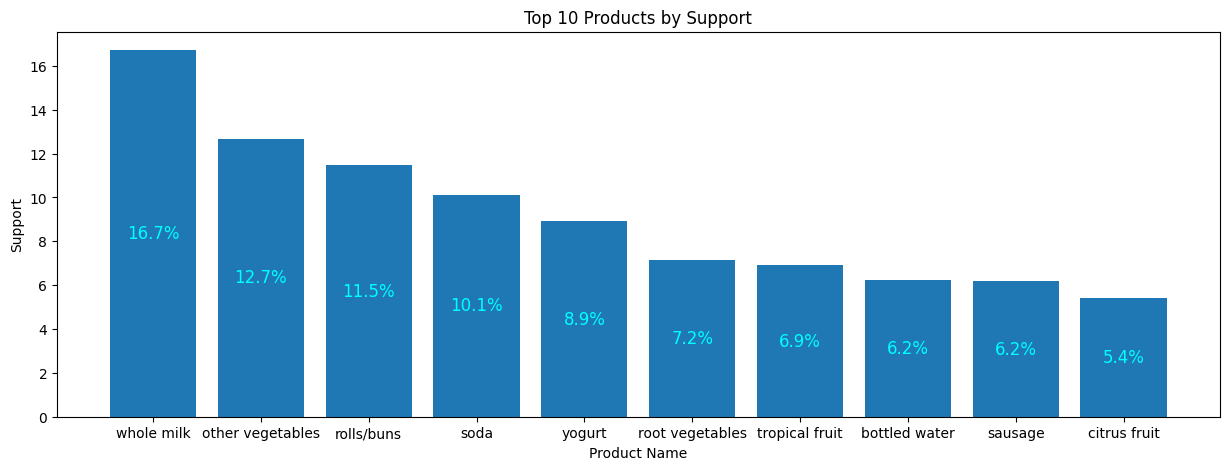

In [ ]:
# Plotting support of Top 10 Items
plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(len(support.head(10))), labels = support.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

# Implementing Apriori Library

In [ ]:
# Importing Apriori Algorithm
from apyori import apriori

In [ ]:
# Converting Transactions to list
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [ ]:
# Defining Association Rules 0.001 0.05
rules = apriori(list_transactions, min_support = 0.001, min_confidence =0.05 , min_lift = 1.2, max_length = 2)
results = list(rules)

In [ ]:
# Creating new data frame of rules and Calculating number of rules
pd.options.display.float_format = '{:,.2f}'.format
final_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df = final_df.append(new_row, ignore_index = True)
final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']
print('Number of Rules: ', final_df['Rules'].count(), 'Rules')
final_df.head()

Number of Rules:  30 Rules


<ipython-input-34-2f041a6c5b87>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-34-2f041a6c5b87>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-34-2f041a6c5b87>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-34-2f041a6c5b87>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-34-2f041a6c5b87>:13: FutureWarning: The frame.append method is deprecated

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
3,sugar,bottled water,0.15,8.30,1.37,sugar -> bottled water
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer


# Visualization

Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

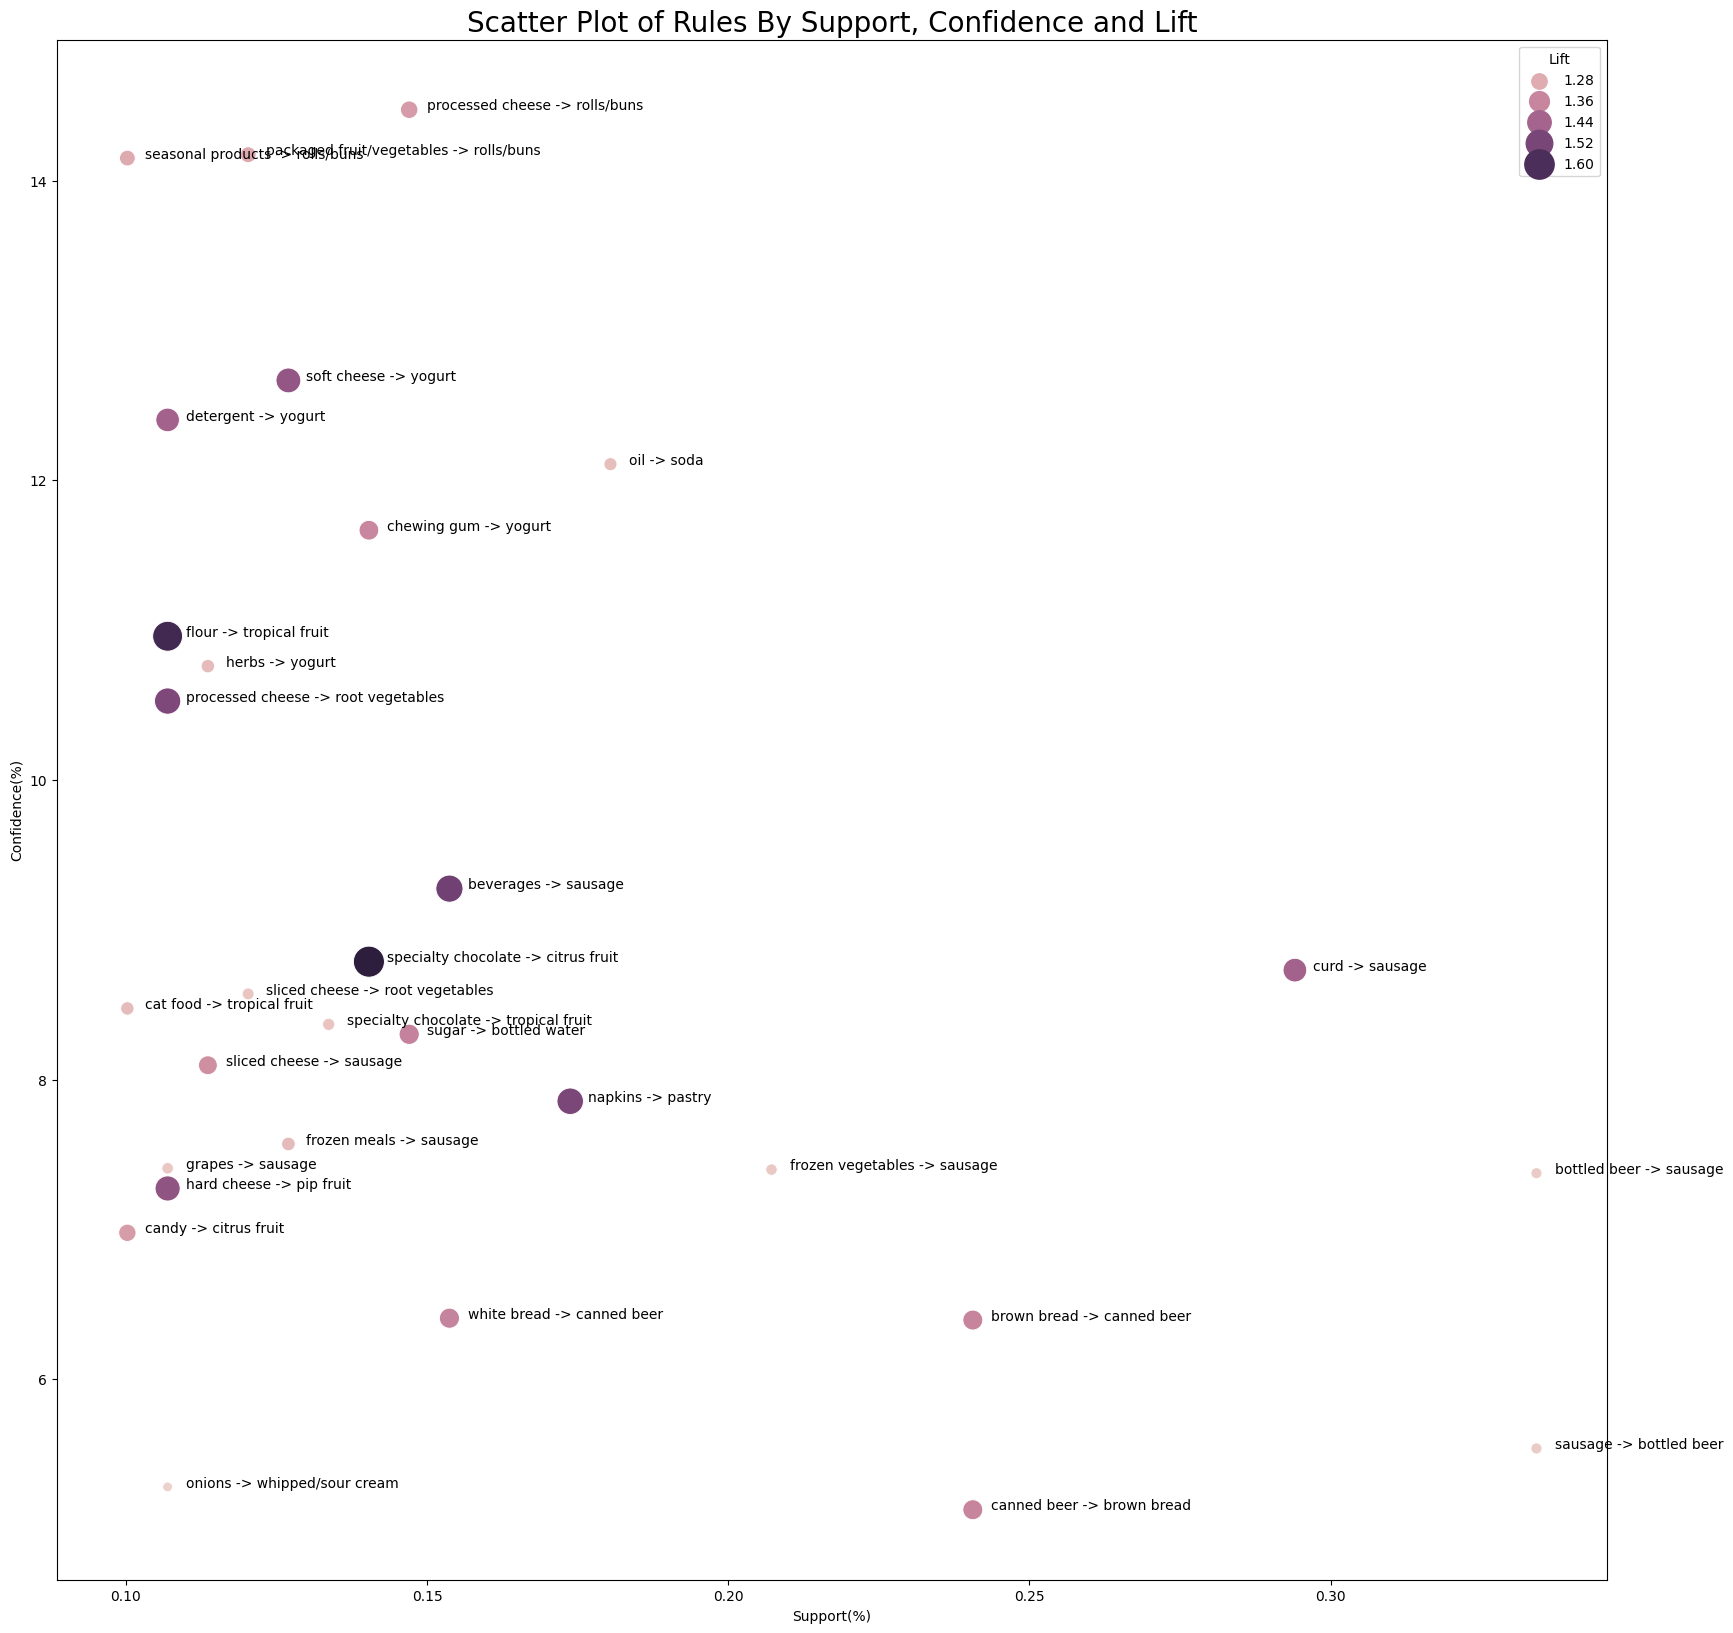

In [ ]:
# Plotting support, confidence and lift of rules
plt.figure(figsize = (20,20))
support = final_df['Support(%)']
confidence = final_df['Confidence(%)']
rule = final_df['Rules']
ax = sns.scatterplot(data = final_df, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

In [ ]:
# Changing rules Parameters
rules_2 = apriori(list_transactions, min_support = 0.001, min_confidence = 0.1, max_length = 3)
results_2 = list(rules_2)

In [ ]:
# Creating new data frame of new rules and Calculating number of rules
pd.options.display.float_format = '{:,.2f}'.format
final_df_2 = pd.DataFrame(columns = ['Left Hand Side 1', 'Left Hand Side 2','Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results_2:
    if len(i[0]) > 2:
        for j in range(0, len(i[2])):
            LHS1 = list(i[2][j][0])[0]
            LHS2 = list(i[2][j][0])[1]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side 1': LHS1, 'Left Hand Side 2': LHS2 ,'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df_2 = final_df_2.append(new_row, ignore_index = True)
final_df_2['Rules'] = final_df_2['Left Hand Side 1'] + ' + ' + final_df_2['Left Hand Side 2'] + ' -> ' + final_df_2['Right Hand Side']
print('Number of Rules: ', final_df_2['Rules'].count(), 'Rules')
final_df_2.head()

Number of Rules:  17 Rules


<ipython-input-25-e22373ec0c2e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-25-e22373ec0c2e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-25-e22373ec0c2e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-25-e22373ec0c2e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = final_df_2.append(new_row, ignore_index = True)
<ipython-input-25-e22373ec0c2e>:14: FutureWarning: The frame.append meth

,Left Hand Side 1,Left Hand Side 2,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,other vegetables,rolls/buns,soda,0.11,10.76,1.11,other vegetables + rolls/buns -> soda
1,other vegetables,soda,rolls/buns,0.11,11.72,1.07,other vegetables + soda -> rolls/buns
2,soda,rolls/buns,other vegetables,0.11,14.05,1.15,soda + rolls/buns -> other vegetables
3,other vegetables,rolls/buns,whole milk,0.12,11.39,0.72,other vegetables + rolls/buns -> whole milk
4,other vegetables,soda,whole milk,0.11,11.72,0.74,other vegetables + soda -> whole milk


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

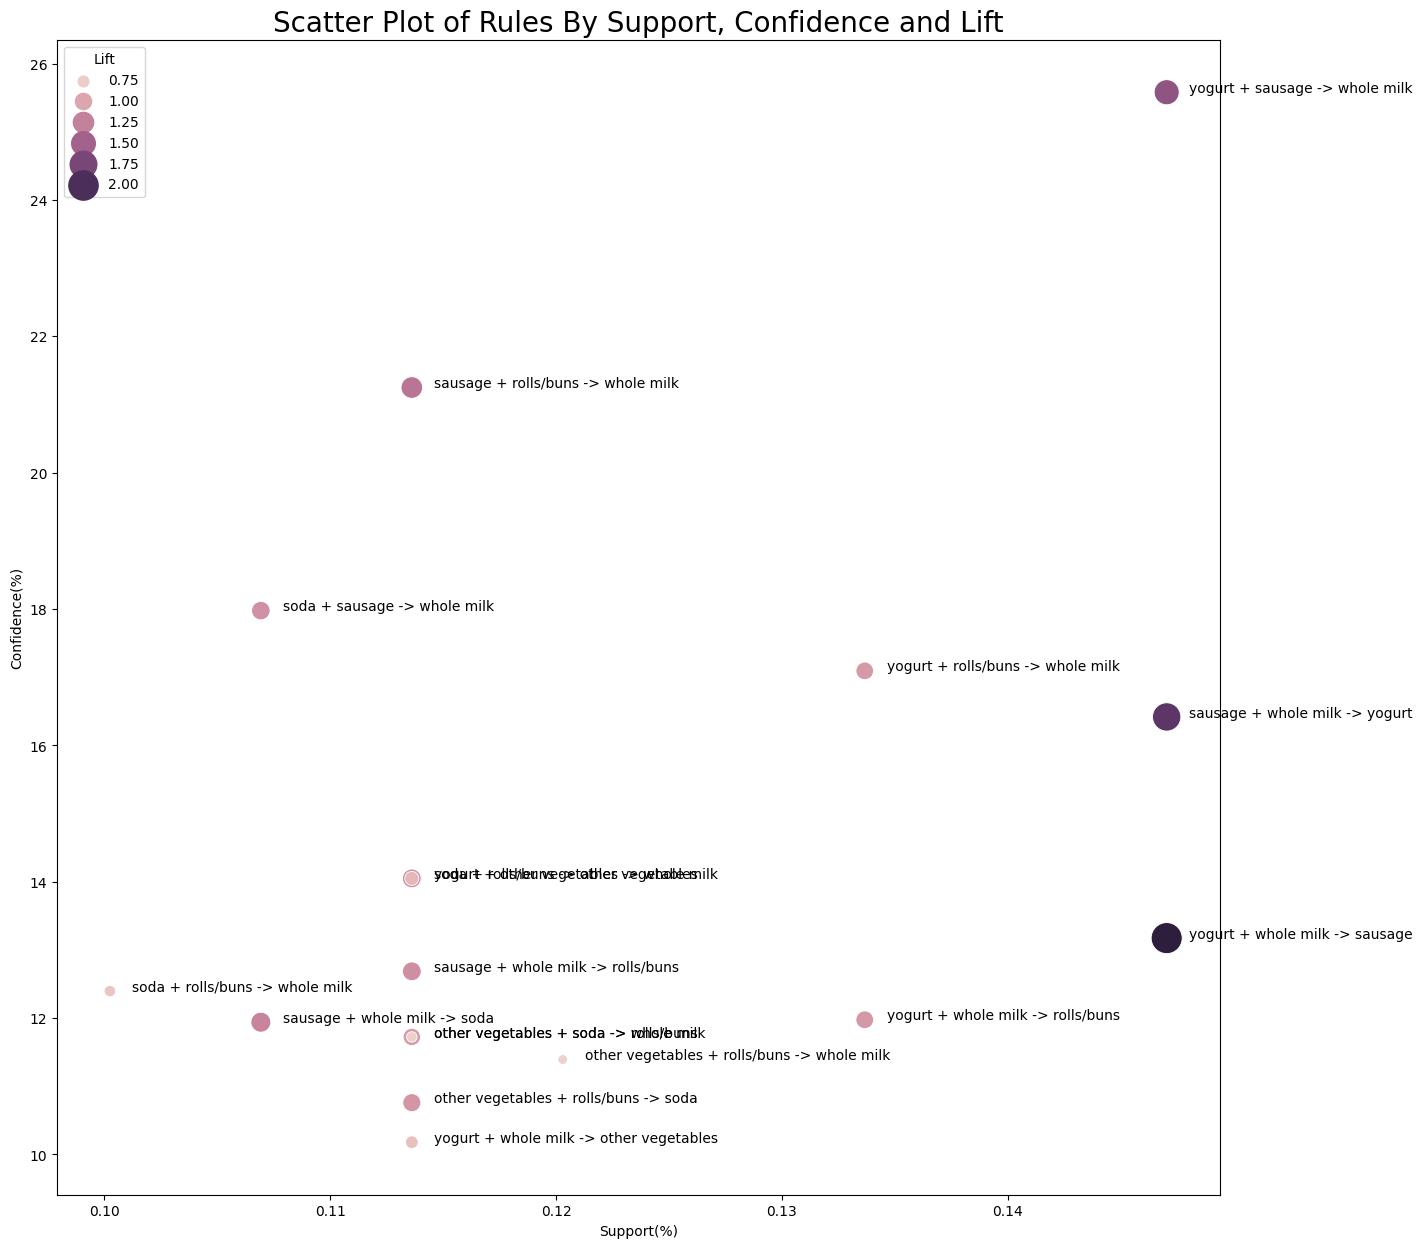

In [ ]:
# Plotting support, confidence and lift of new rules
plt.figure(figsize = (15,15))
support = final_df_2['Support(%)']
confidence = final_df_2['Confidence(%)']
rule = final_df_2['Rules']
ax = sns.scatterplot(data = final_df_2, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.001, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

finally we have done market basket analysis with apriori algorithm.
happy kaggling! :)